In [9]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ladydisdain5911/python_course_repo/refs/heads/hw_3/train.csv")

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

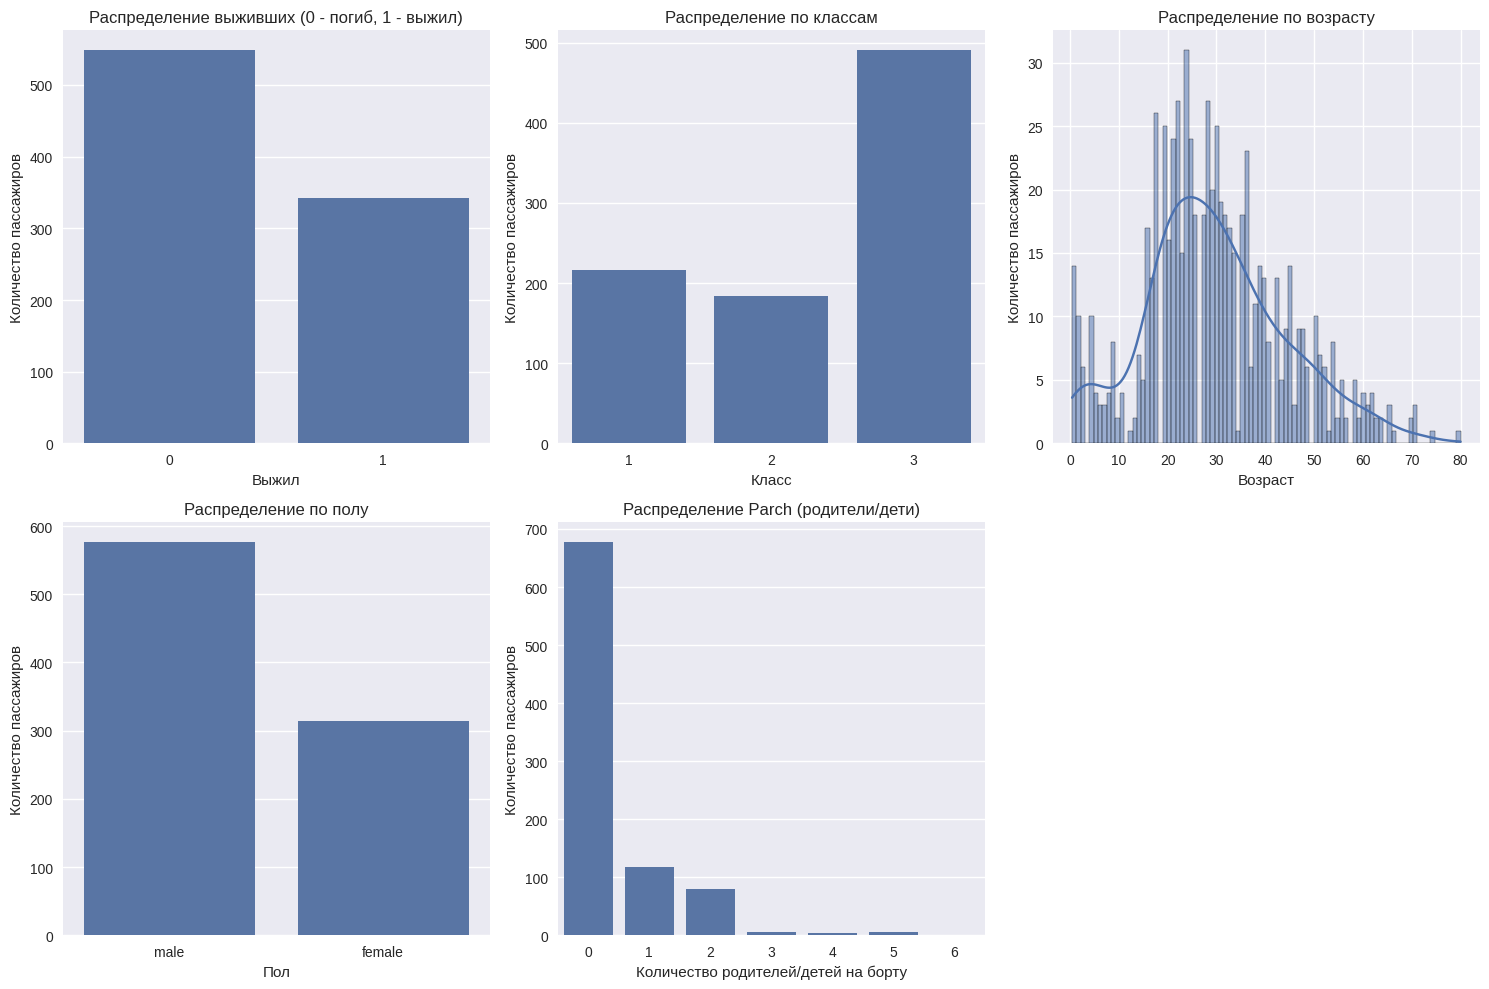

In [16]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Survived')
plt.title('Распределение выживших (0 - погиб, 1 - выжил)')
plt.xlabel('Выжил')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Pclass')
plt.title('Распределение по классам')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 3)
sns.histplot(data=df, x='Age', bins=90, kde=True)
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Sex')
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Parch')
plt.title('Распределение Parch (родители/дети)')
plt.xlabel('Количество родителей/детей на борту')
plt.ylabel('Количество пассажиров')

plt.tight_layout()
plt.show()

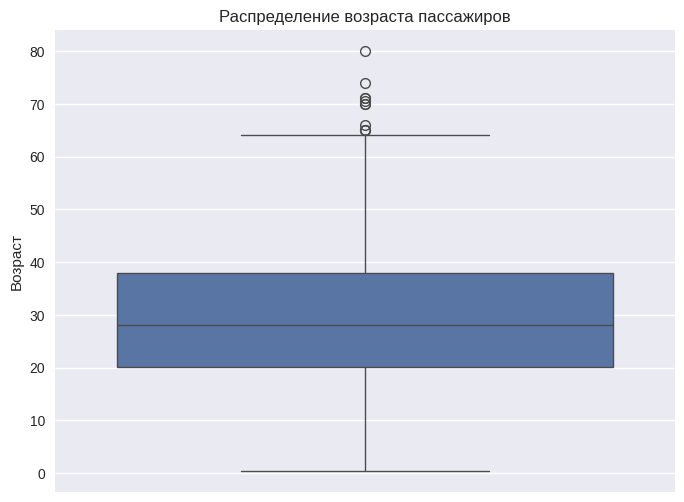

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age')
plt.title('Распределение возраста пассажиров')
plt.ylabel('Возраст')
plt.show()

График показывает, что медианный возраст пассажиров составлял около 28 лет. Большинство пассажиров (межквартильный диапазон) были в возрасте от 20 до 38 лет. На графике видны выбросы - это пожилые пассажиры старше 65 лет, которых было относительно мало.

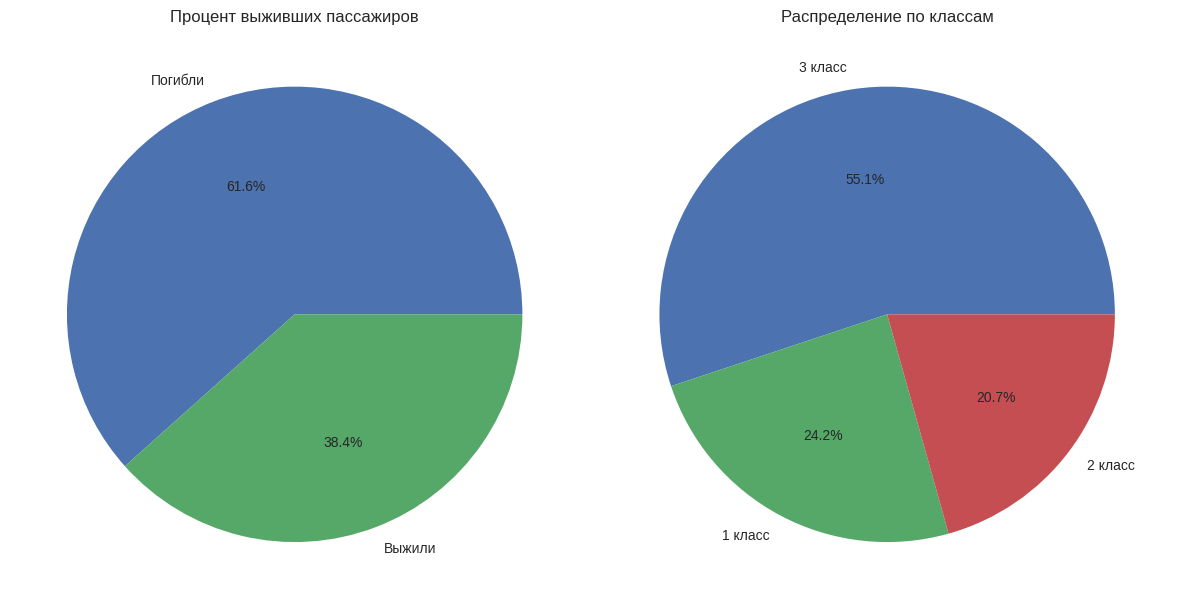

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=['Погибли', 'Выжили'], autopct='%1.1f%%')
plt.title('Процент выживших пассажиров')

plt.subplot(1, 2, 2)
pclass_counts = df['Pclass'].value_counts()
plt.pie(pclass_counts, labels=['3 класс', '1 класс', '2 класс'], autopct='%1.1f%%')
plt.title('Распределение по классам')

plt.tight_layout()
plt.show()

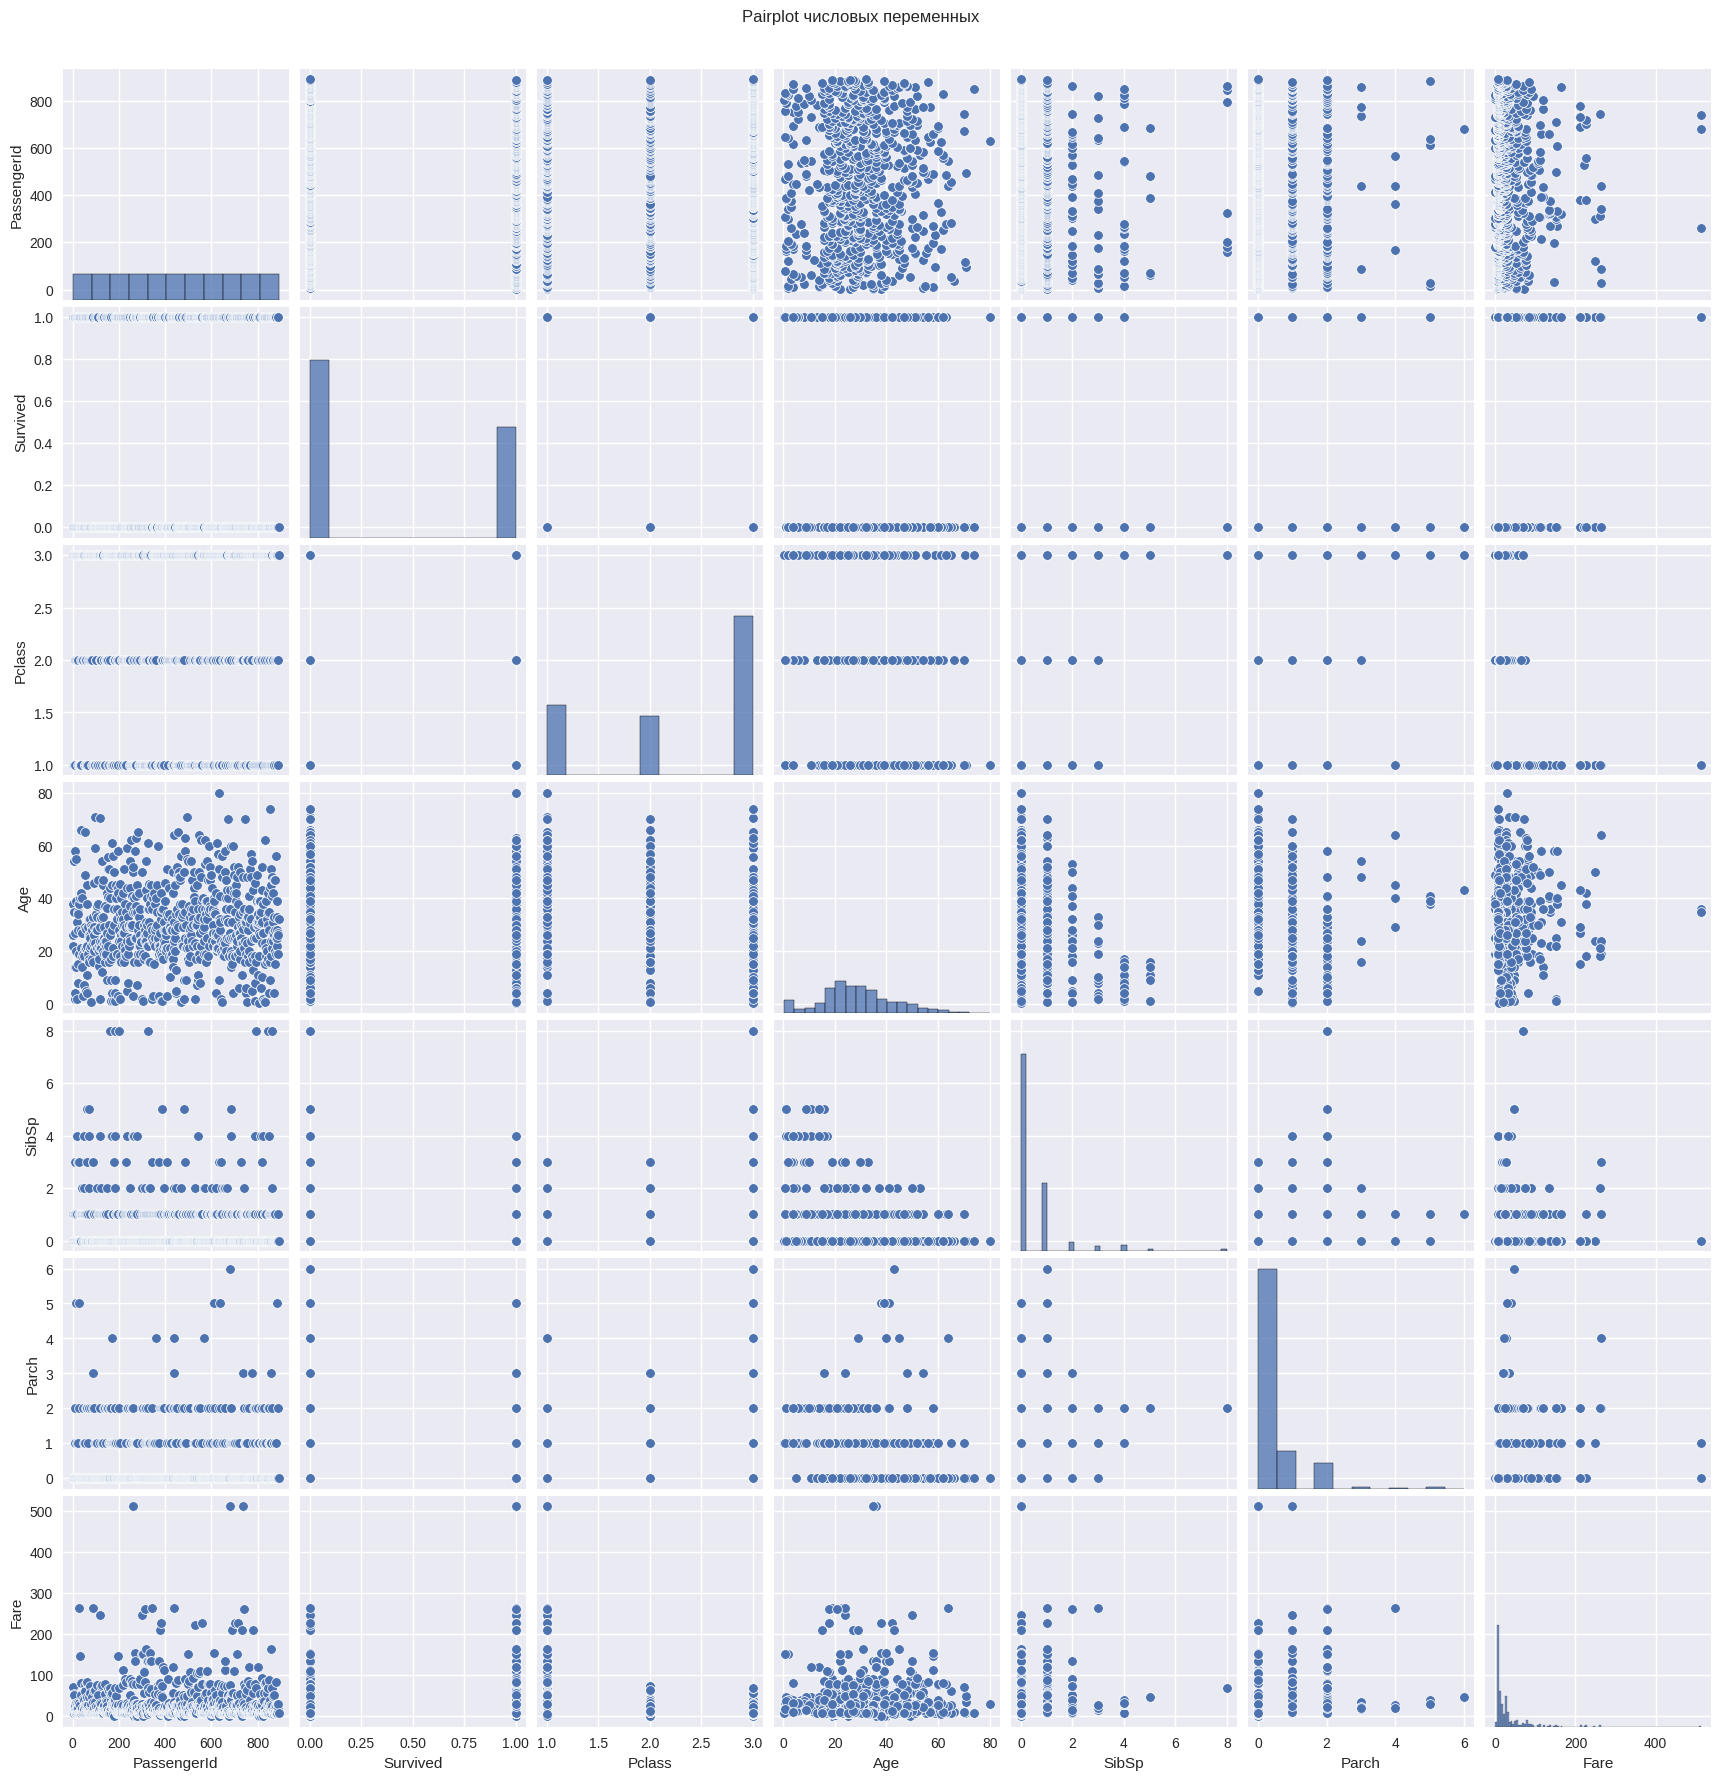

In [14]:
sns.pairplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.suptitle('Pairplot числовых переменных', y=1.02)
plt.show()

In [15]:
class_sex_counts = df.groupby(['Pclass', 'Sex']).size().reset_index(name='counts')
class_sex_counts['Pclass'] = 'Класс ' + class_sex_counts['Pclass'].astype(str)

fig = px.sunburst(
    class_sex_counts,
    path=['Pclass', 'Sex'],
    values='counts',
    title='Распределение пассажиров по классам и полу'
)
fig.update_traces(textinfo="label+percent parent")
fig.show()